#Predicción de enfermedades cardíacas
 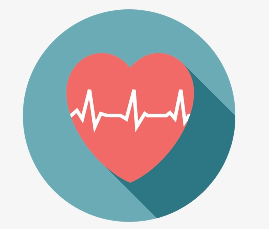

1.   El objetivo es armar un clasificador binario que permita predecir si un paciente podría presentar o no enfermedades cardíacas.
2.   Deberá entrenar un modelo clasificador y varios algoritmos para clasificación.Por ejemplo, en el caso de seleccionar un RandomForest debe entrenar con distinto número de estimadores (distantas cantidad de árboles), pero a su vez entrenar distintos KNN o regresión logística, etc. Deberá compararlos utilizando la métrica adecuada y elegir el mejor modelo.
3. Entre el dataset encontrará datos categóricos que requieren ser codificados, y datos numéricos para normalizar.
4. A modo de análisis, debe identificar si el dataset se encuentra correctamente balanceado (entre pacientes con y sin enfermedad cardíaca), y como está balanceado el dataset en cuanto a género y edad (este análisis es unicamente a modo informativo).

#Objetivo
***El accuracy del modelo definitivo debe superar el 80% (0.8)***

In [85]:
#Librerias a implementar
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

## Descarga del dataset


In [86]:

if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

***El archivo `heart.csv` contiene la siguiente informacion:***
- **Edad:** edad del paciente (V. Cuantitativa discreta)
- **Sexo:** Sexo del paciente (Categórica con dos niveles: Femenino y Masculino)
- **Cp:** Tipo de dolor en el pecho (Categórica con 4 tipos)
Tipo 1: Angina típica
Tipo 2: Angina Atípica
Tipo 3: Dolor no anginal
Tipo 4: Asintomático
- **trestbps**: Presión arterial en reposo en mm Hg al ingreso al hospital (V. continua)
- **chol:** Colesterol sérico en mg /dl (V. continua)
- **fbs:** azúcar en sangre en ayunas > 120 mg/dl (categórica con 2 niveles: verdadero, falso)
- **restecg:** Resultados electrocardiográficos en reposo (Categórica con 3 niveles)
Nivel 0: Normal
Nivel 1: Tener anormalidad de onda ST-T (inversiones de onda T y / o elevación o Depresión de ST de > 005 mV)
Nivel 2: Muestra hipertropía ventricular izquierda probable o definitiva según los criterios de Estes.
- **thalach:** Frecuencia cardiaca máxima alcanzada (V. continua)
- **exang:** Angina inducida por el ejercicio (Categórica con dos niveles: Si, No)
- **oldpeak:** Depresión del ST inducida por el ejercicio en relación con el descanso (V. continua)
- **slope:** La pendiente del segmento ST de ejercicio pico (categórica con 3 niveles)
Valor 1: ascenso
Valor 2: plano
Valor 3: descenso
- **ca:** Numero de vasos principales (0-3) coloreados por fluoroscopia (Categórica con 4 niveles: 1-2-3-4)
- **thal:** El estado del corazón según la prueba de Thallium (Categórica con 3 niveles)
N = normal;
DF = defecto fijo
DR = defecto reversible
- **num :** Presencia de enfermedad cardíaca (estado de enfermedad angiográfica) (Categórica con 4 niveles)

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [87]:

# Lee con Pandas y el método read_csv. Se almacena en df

# el método describe(), mostrará la descripción estadistica básica del archivo
# Crea una fila nueva llamada Nan en el DataFrame  des,indicando la cantidad de datos tipo Nan que tiene cada columna.
# La información será de los datos faltantes df.isna().sum()
# Crea una fila nueva llamada %Nan en el DataFrame des,
# Esta fila se completará con los porcentajes de Nan encontrados en cada columna
df = pd.read_csv('heart.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [88]:
#Ver las primeras 5 filas del df

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
#Taduce nombre de columnas
df1 = df.copy()
df1.columns = ['edad', 'sexo', 'tipo_dolor_pecho', 'presion_arterial_reposo', 'colesterol','azucar_sangre_ayunas','resultado_cardio_reposo', 'frecuencia_cardiaca_maxima', 'angina_inducida', 'depresion_de_ST', 'segmento_ST_ejecicio_pico', 'numeroos_vasos_principales', 'estado_de_corazon', 'target']
df1.head()

,edad,sexo,tipo_dolor_pecho,presion_arterial_reposo,colesterol,azucar_sangre_ayunas,resultado_cardio_reposo,frecuencia_cardiaca_maxima,angina_inducida,depresion_de_ST,segmento_ST_ejecicio_pico,numeroos_vasos_principales,estado_de_corazon,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
#Cantidad de datos a observar
print('Cantidad de datos en observacion:', df1.shape[0])

Cantidad de datos en observacion: 303


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [91]:
#pacientes con y sin enfermedad
df1['target'].replace({0:"enfermo", 1:"no enfermo"}).value_counts()



no enfermo    165
enfermo       138
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

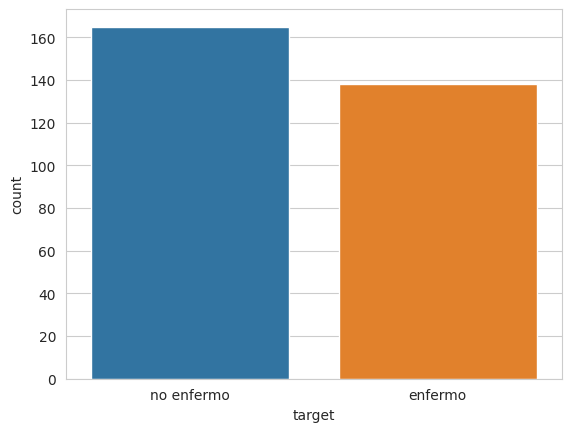

In [92]:
#grafico pacientes con y sin enfermedad
sns.countplot(x=df1['target'].replace({0:"enfermo", 1:"no enfermo"}))
plt.show

In [93]:
#porcentaje de enfermos y no enfermos
enfermo = len(df1[df1.target == 0])
no_enfermo = len(df1[df1.target == 1])
print("Porcentaje de paciente que poseen enfermedad cardiaca: {:.2f}%".format((enfermo / (len(df.target))*100)))
print("Porcentaje de pacientes que NO poseen enfermedad cardiaca: {:.2f}%".format((no_enfermo / (len(df.target))*100)))

Porcentaje de paciente que poseen enfermedad cardiaca: 45.54%
Porcentaje de pacientes que NO poseen enfermedad cardiaca: 54.46%


<Axes: xlabel='sexo', ylabel='count'>

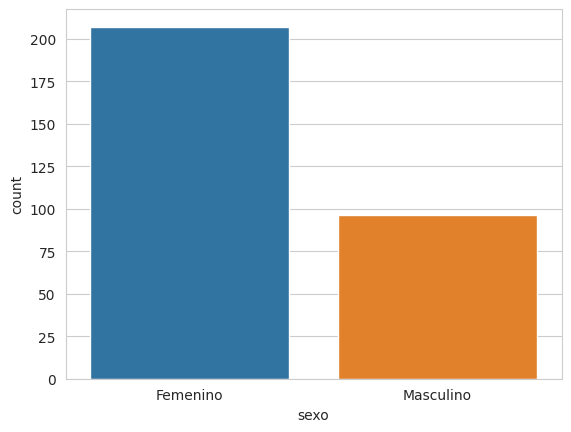

In [94]:
#Grafico segun sexo
sns.countplot(x=df1['sexo'].replace({0:'Masculino', 1:'Femenino'}))

In [95]:
#Porcetajes de pacientes masculinos y femeninos
Masculino = len(df1[df1.sexo == 0])
Femenino = len(df1[df1.sexo == 1])
print("Porcentaje de pacientes Masculino: {:.2f}%".format((Masculino / (len(df1.sexo))*100)))
print("Porcentaje de pacientes Femenino: {:.2f}%".format((Femenino / (len(df1.sexo))*100)))

Porcentaje de pacientes Masculino: 31.68%
Porcentaje de pacientes Femenino: 68.32%


In [96]:
#agrupar segun target
df1.groupby('target').mean()

,edad,sexo,tipo_dolor_pecho,presion_arterial_reposo,colesterol,azucar_sangre_ayunas,resultado_cardio_reposo,frecuencia_cardiaca_maxima,angina_inducida,depresion_de_ST,segmento_ST_ejecicio_pico,numeroos_vasos_principales,estado_de_corazon
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


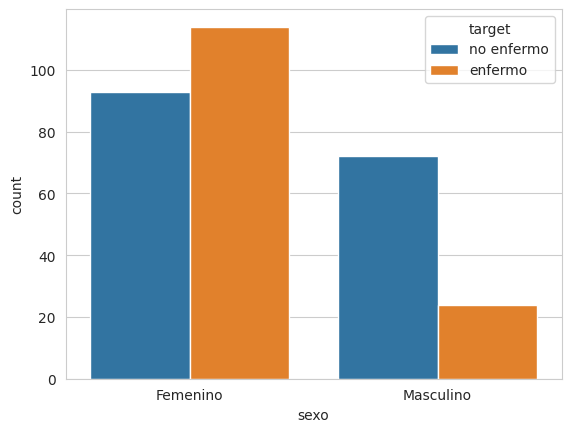

In [97]:
#Pacientes con y sin enfermedad segun sexo
sns.countplot(x=df1['sexo'].replace({0:'Masculino', 1:'Femenino'}), hue=df1['target'].replace({0:"enfermo", 1:"no enfermo"}))
plt.show()

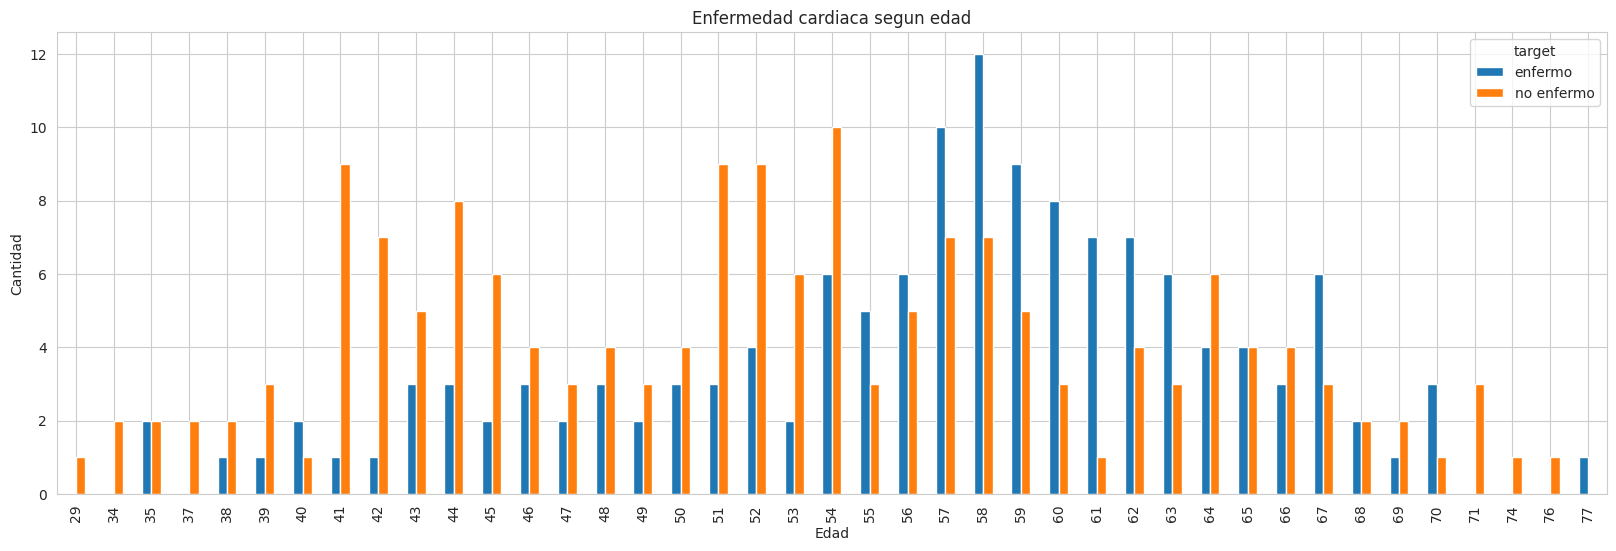

In [98]:
#Cantidad de pacientes segun edad si estan enfermos o no
pd.crosstab(df1.edad,df1.target.replace({0:"enfermo", 1:"no enfermo"})).plot(kind="bar",figsize=(20,6))
plt.title('Enfermedad cardiaca segun edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.show()

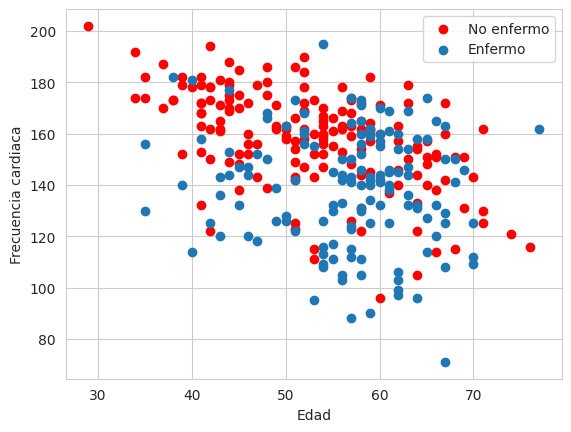

In [99]:
#scatter para ver distribucion  de enfermos y no enfermos en base a la edad y la frecuencia cardiaca
plt.scatter(x=df1.edad[df1.target==1], y=df1.frecuencia_cardiaca_maxima[(df1.target==1)], c="red")
plt.scatter(x=df1.edad[df1.target==0], y=df1.frecuencia_cardiaca_maxima[(df1.target==0)])
plt.legend(["No enfermo", "Enfermo"])
plt.xlabel("Edad")
plt.ylabel("Frecuencia cardiaca")
plt.show()

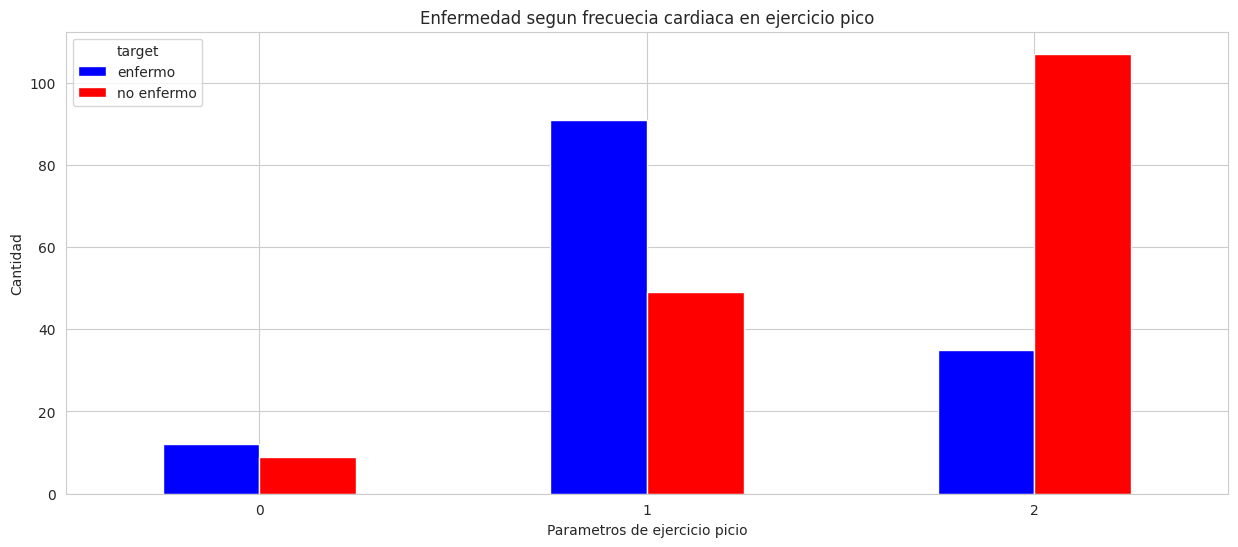

In [100]:
pd.crosstab(df1.segmento_ST_ejecicio_pico,df1.target.replace({0:"enfermo", 1:"no enfermo"})).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Enfermedad segun frecuecia cardiaca en ejercicio pico')
plt.xlabel('Parametros de ejercicio picio')
plt.xticks(rotation = 0)
plt.ylabel('Cantidad')
plt.show()

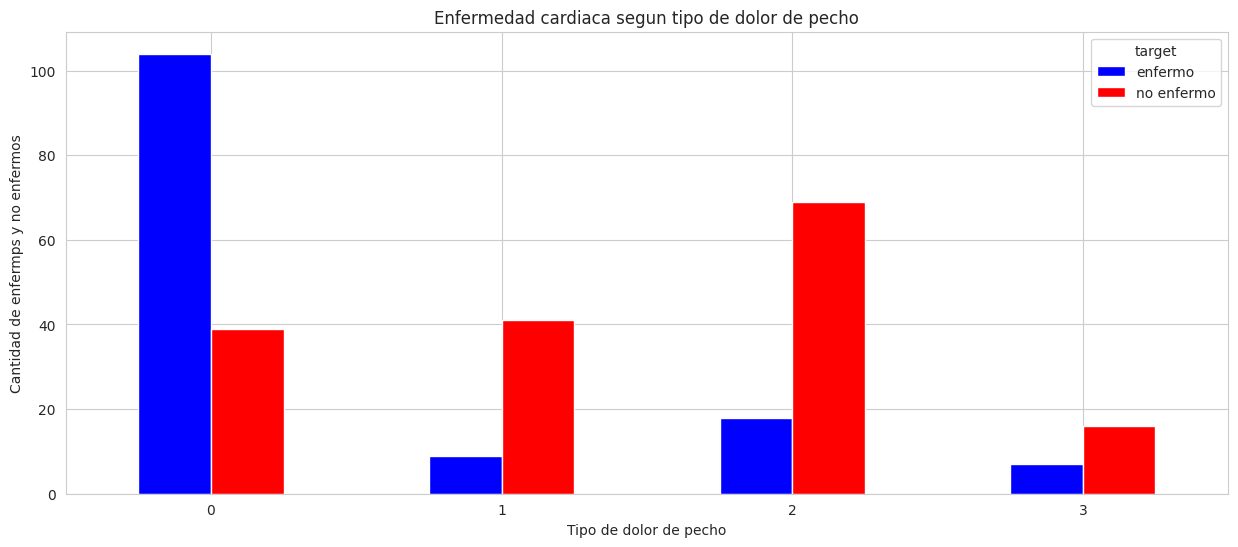

In [101]:
pd.crosstab(df1.tipo_dolor_pecho,df1.target.replace({0:"enfermo", 1:"no enfermo"})).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Enfermedad cardiaca segun tipo de dolor de pecho')
plt.xlabel('Tipo de dolor de pecho')
plt.xticks(rotation = 0)
plt.ylabel('Cantidad de enfermps y no enfermos')
plt.show()

In [102]:
#oneHotenconding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df1, column):
    df_copy = df1.copy()

    # LabelEncoder
    le = LabelEncoder()
    label_encoding = le.fit_transform(df_copy[column])

    # OneHotEncoder
    onehot_encoder = OneHotEncoder(sparse=False)
    one_hot_encoding = onehot_encoder.fit_transform(label_encoding.reshape(-1, 1))

    # Crear las columnas con el resultado del encoder
    one_hot_encoding_df = pd.DataFrame(one_hot_encoding, columns=le.classes_, dtype=int)

    # Agregar sufijo
    one_hot_encoding_df = one_hot_encoding_df.add_prefix(column+'_')

    # Unir nuevas columnas al dataset
    df_copy = df_copy.join(one_hot_encoding_df)

    # Eliminar vieja columna del dataset
    df_copy = df_copy.drop([column], axis=1)
    return df_copy, le, onehot_encoder


In [103]:
#Tipo de dolor en el pecho
# electro en reposo
#segmento ST de ejercicio pico
#El estado del corazón

df1, le_tdp, ohe_tdp = one_hot_encoding(df1, 'tipo_dolor_pecho')
df1, le_rcr, ohe_rcr = one_hot_encoding(df1, 'resultado_cardio_reposo')
df1, le_sstep, ohe_sstep = one_hot_encoding(df1, 'segmento_ST_ejecicio_pico')
df1, le_edc, ohe_edc = one_hot_encoding(df1, 'estado_de_corazon')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [104]:
df1.head()

,edad,sexo,presion_arterial_reposo,colesterol,azucar_sangre_ayunas,frecuencia_cardiaca_maxima,angina_inducida,depresion_de_ST,numeroos_vasos_principales,target,...,resultado_cardio_reposo_0,resultado_cardio_reposo_1,resultado_cardio_reposo_2,segmento_ST_ejecicio_pico_0,segmento_ST_ejecicio_pico_1,segmento_ST_ejecicio_pico_2,estado_de_corazon_0,estado_de_corazon_1,estado_de_corazon_2,estado_de_corazon_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [105]:
#Normalizar datos
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


df1.loc[:, 'edad'] = scaler.fit_transform(df1[['edad']])
df1.loc[:, 'presion_arterial_reposo'] = scaler.fit_transform(df1[['presion_arterial_reposo']])
df1.loc[:, 'colesterol'] = scaler.fit_transform(df1[['colesterol']])
df1.loc[:, 'frecuencia_cardiaca_maxima'] = scaler.fit_transform(df1[['frecuencia_cardiaca_maxima']])
df1.loc[:, 'depresion_de_ST'] = scaler.fit_transform(df1[['depresion_de_ST']])
# Observar las  5 primeras filas
df1.head()


,edad,sexo,presion_arterial_reposo,colesterol,azucar_sangre_ayunas,frecuencia_cardiaca_maxima,angina_inducida,depresion_de_ST,numeroos_vasos_principales,target,...,resultado_cardio_reposo_0,resultado_cardio_reposo_1,resultado_cardio_reposo_2,segmento_ST_ejecicio_pico_0,segmento_ST_ejecicio_pico_1,segmento_ST_ejecicio_pico_2,estado_de_corazon_0,estado_de_corazon_1,estado_de_corazon_2,estado_de_corazon_3
0,0.708333,1,0.481132,0.244292,1,0.603053,0,0.370968,0,1,...,1,0,0,1,0,0,0,1,0,0
1,0.166667,1,0.339623,0.283105,0,0.885496,0,0.564516,0,1,...,0,1,0,1,0,0,0,0,1,0
2,0.250000,0,0.339623,0.178082,0,0.770992,0,0.225806,0,1,...,1,0,0,0,0,1,0,0,1,0
3,0.562500,1,0.245283,0.251142,0,0.816794,0,0.129032,0,1,...,0,1,0,0,0,1,0,0,1,0
4,0.583333,0,0.245283,0.520548,0,0.702290,1,0.096774,0,1,...,0,1,0,0,0,1,0,0,1,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

In [106]:
# numpy array "X" 
# array numpy "y" de solo la columna Survived
X = df1.drop('target', axis=1).values
y = df1['target'].values

In [107]:
# dataset de train y test 70%30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
accuracies = {}

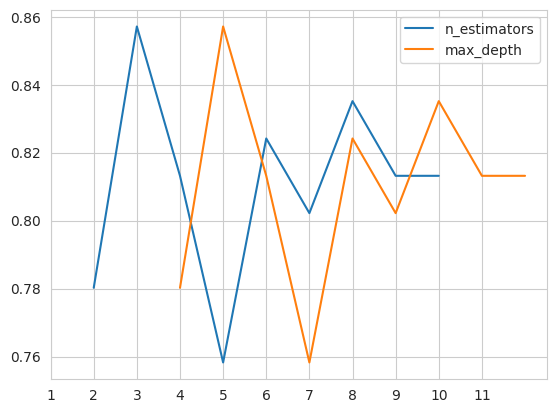

Acuraccy alcanzado 85.71%


In [129]:
#Randomforest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
n_list = []
max_list = []
acu_list = []
m = 4
for n in range(2,11):
  clf = RandomForestClassifier(n_estimators=n, max_depth=m, criterion='entropy', random_state=0)
  clf.fit(X_train, y_train)
  y_hat_ra = clf.predict(X_test)
  
# Calcular la exactitud (accuracy)
  acu_score = accuracy_score(y_test, y_hat_ra, normalize=True)
#guardear en la lista el score
  acu_list.append(acu_score)
#guardar en la lista los n_estimators
  n_list.append(n)
#guardar en la list los max_depth
  max_list.append(m)

  m += 1


sns.lineplot(x=n_list,  y=acu_list, label='n_estimators')
sns.lineplot(x=max_list,  y=acu_list, label='max_depth')
plt.xticks(np.arange(1,12,1))
plt.show()

acc = max(acu_list)*100
accuracies['Random Forest'] = acc
print('Acuraccy alcanzado {:.2f}%'.format(acc))





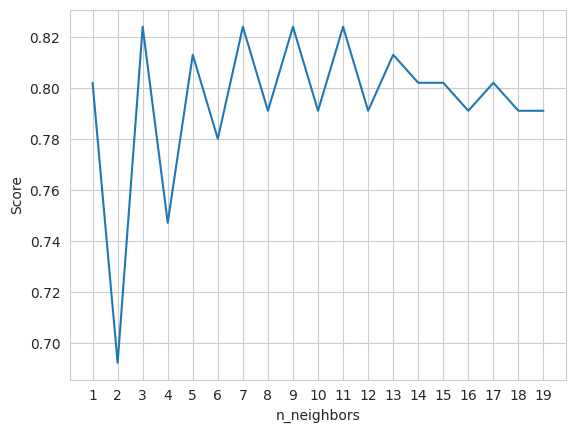

Acuraccy alcanzado 82.42%


In [110]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

lista_acuraccy = []

for i in range(1,20):
  clf = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
  y_hat_kn = clf.predict(X_test)
  lista_acuraccy.append(accuracy_score(y_test, y_hat_kn, normalize=True))

plt.plot(range(1,20), lista_acuraccy)
plt.xticks(np.arange(1,20,1))
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.show()

acc = max(lista_acuraccy)*100
accuracies['KNN'] = acc
print("Acuraccy alcanzado {:.2f}%".format(acc))

In [111]:
#Regresion lgistica
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf = clf.fit(X_train, y_train)
y_hat_log = clf.predict(X_test)


acc = (accuracy_score(y_test, y_hat_log, normalize=True))*100
accuracies['Regresion Logistica'] = acc
print("Acuraccy alcanzado {:.2f}%".format(acc))

Acuraccy alcanzado 81.32%


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

# **Random Forest**

In [112]:
# accuracy random forest
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat_ra, normalize=True)

0.8131868131868132

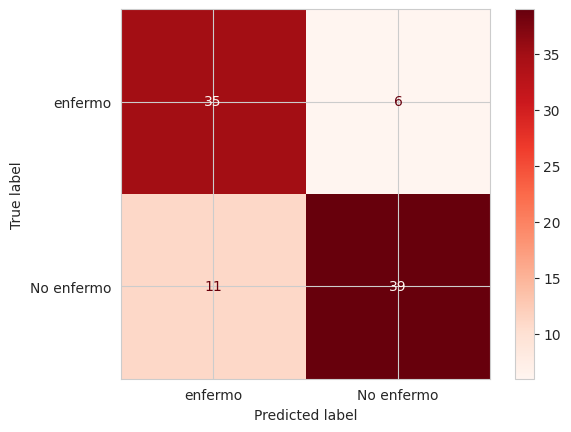

In [113]:
#Matriz de confusion random forest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat_ra)

cmd = ConfusionMatrixDisplay(cm, display_labels=['enfermo', 'No enfermo'])


cmd.plot(cmap=plt.cm.Reds)


plt.show()

# **KNN**

In [114]:
# accuracy knn
accuracy_score(y_test, y_hat_kn, normalize=True)

0.7912087912087912

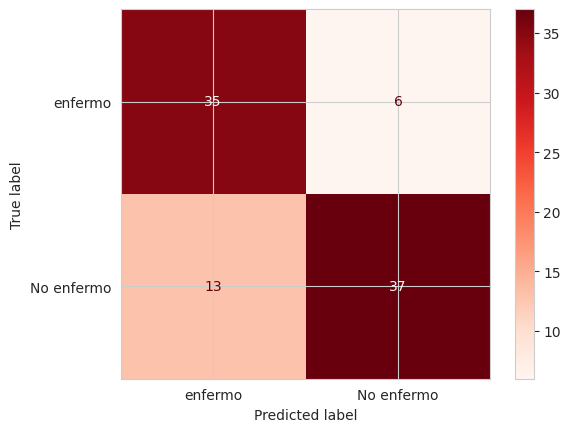

In [115]:
#Matriz de confusion knn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat_kn)

cmd = ConfusionMatrixDisplay(cm, display_labels=['enfermo', 'No enfermo'])

cmd.plot(cmap=plt.cm.Reds)

plt.show()

# **Regresion Logistica**

In [116]:
# accuracy regresion logistica
accuracy_score(y_test, y_hat_log, normalize=True)

0.8131868131868132

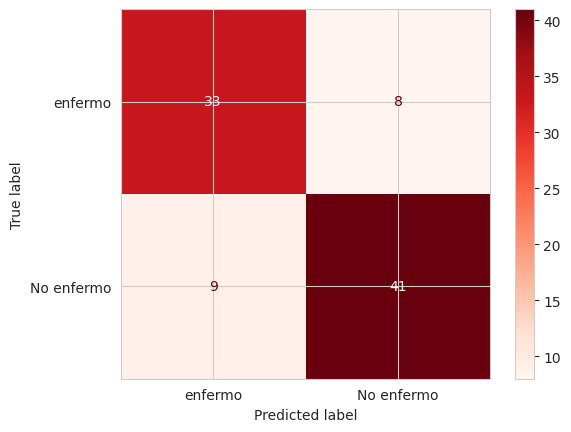

In [117]:
#Matriz de confusion regresion logistica
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat_log)

cmd = ConfusionMatrixDisplay(cm, display_labels=['enfermo', 'No enfermo'])

cmd.plot(cmap=plt.cm.Reds)

plt.show()

#Clasificacion Binaria con redes neuronales

In [118]:
#Entrada y salida 
in_shape = X.shape[1] 
out_shape = 1


In [119]:
#porcenjate de entrenamiento 80 - 20
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
#Clasificacion Binaria con redes neuronales
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
model = Sequential()

dropout_rate = 0.2

model.add(Dense(units=120, activation='sigmoid', input_shape=(in_shape,)))

model.add(Dense(units=100, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=out_shape, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 120)               2880      
                                                                 
 dense_18 (Dense)            (None, 100)               12100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)              

In [121]:
#Clasificacion Binaria con redes neuronales
history = model.fit(X_train_b, y_train_b, validation_split=0.2 , epochs=50, batch_size=32)

Epoch 1/50
7/7 [==============================] - 1s 37ms/step - loss: 0.7054 - accuracy: 0.5181 - val_loss: 0.6803 - val_accuracy: 0.4286
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.6916 - accuracy: 0.6062 - val_loss: 0.6236 - val_accuracy: 0.7959
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6759 - accuracy: 0.5803 - val_loss: 0.5392 - val_accuracy: 0.8163
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 0.5674 - accuracy: 0.6891 - val_loss: 0.5253 - val_accuracy: 0.6735
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5354 - accuracy: 0.7513 - val_loss: 0.7204 - val_accuracy: 0.5510
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5660 - accuracy: 0.7098 - val_loss: 0.5077 - val_accuracy: 0.7347
Epoch 7/50
7/7 [==============================] - 0s 12ms/step - loss: 0.5901 - accuracy: 0.7202 - val_loss: 0.5096 - val_accuracy: 0.7959
Epoch 8/50
7/7 [============

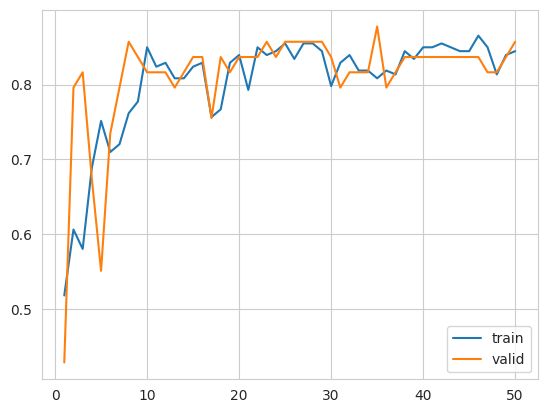

In [122]:
#Clasificacion Binaria con redes neuronales
epocas_conteo= range(1, len(history.history['accuracy']) + 1)

sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [123]:
#Clasificacion Binaria con redes neuronales
y_hat_prob = model.predict(X_test_b)
y_hat_prob[:3]

2/2 [==============================] - 0s 5ms/step


array([[0.05593842],
       [0.64494205],
       [0.6878688 ]], dtype=float32)

In [124]:
#Clasificacion Binaria con redes neuronales

y_hat_b = np.array([0 if i<0.5 else 1 for i in y_hat_prob])
y_hat_b


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])


*  0 es enferno
* 1 no esta enfermmo  




# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [125]:
#Clasificacion Binaria con redes neuronales
scores = model.evaluate(X_test_b, y_test_b)



2/2 [==============================] - 0s 8ms/step - loss: 0.3332 - accuracy: 0.8852


In [126]:
#Clasificacion Binaria con redes neuronales
from sklearn.metrics import accuracy_score

acc = (accuracy_score(y_test_b, y_hat_b, normalize=True))*100
accuracies['Redes Neuronales'] = acc
print("Acuraccy alcanzado {:.2f}%".format(acc))

Acuraccy alcanzado 88.52%


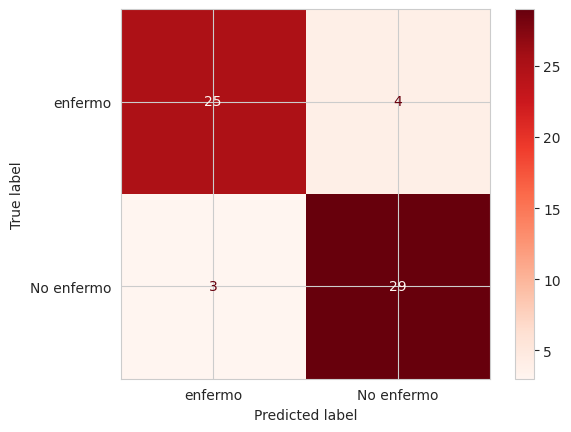

In [127]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_b, y_hat_b)

cmd = ConfusionMatrixDisplay(cm, display_labels=['enfermo', 'No enfermo'])

cmd.plot(cmap=plt.cm.Reds)

plt.show()

# Conclucion
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

En conclucion se puede apreciar despues de el trabajo realizado que el modelo de Redes Neuronales se adapta mejor a la prediccion de enfermedades cardiacas, sin embargo cabe destacar que todos los modelos predictivos utilizados en el proyecto han sido muy parejos en cuanto a sus resultados, todos superando el 80%.




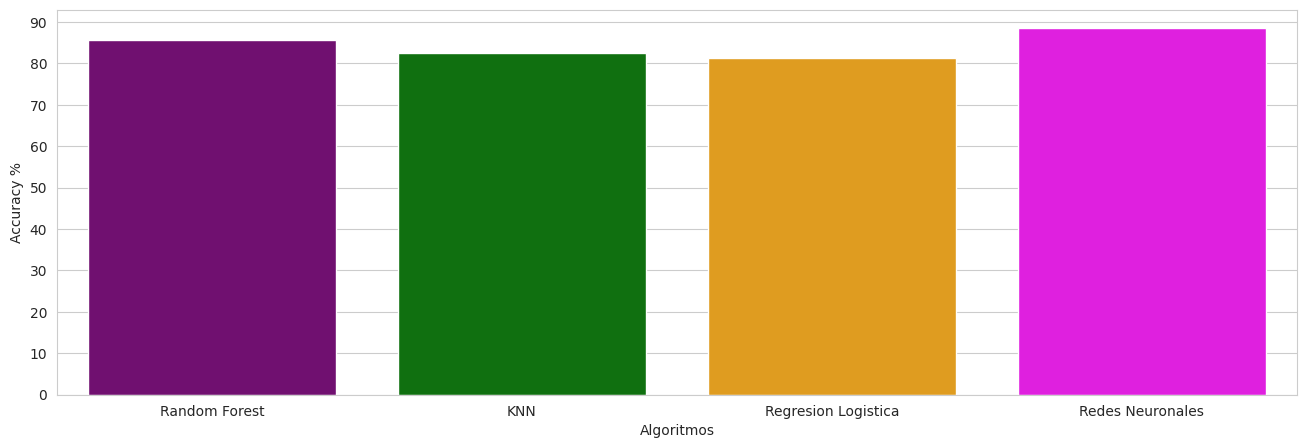

In [128]:
#Comparar modelos
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algoritmos")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()
